In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import ADASYN

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.sparse import csr_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.cross_decomposition import PLSRegression

In [ ]:
!python --version


Python 3.10.12


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the singlecell_classification data
data_path = '/content/drive/MyDrive/fulldata.csv'
# Read the CSV data
df = pd.read_csv(data_path)


In [ ]:
display(df)
X = df.drop(['reference','tumourID','CellType'], axis=1)
y = df['tumourID']


,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC145212.2,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,AACGTTGCATCGGACC-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,GGACGTCCAACACCTA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547
4,TACGGGCCATGCAACT-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15491,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15492,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15493,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,0.0,0.0,0.505,0.505,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))

class_labels = np.unique(np.concatenate((y_test, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)



Random Forest Accuracy: 0.9612778315585673
              precision    recall  f1-score   support

       SC156       1.00      0.99      0.99       917
       SC162       0.98      1.00      0.99       429
       SC172       0.95      0.87      0.91       487
       SC174       0.88      0.98      0.93       681
       SC177       1.00      0.96      0.98       585

    accuracy                           0.96      3099
   macro avg       0.96      0.96      0.96      3099
weighted avg       0.96      0.96      0.96      3099



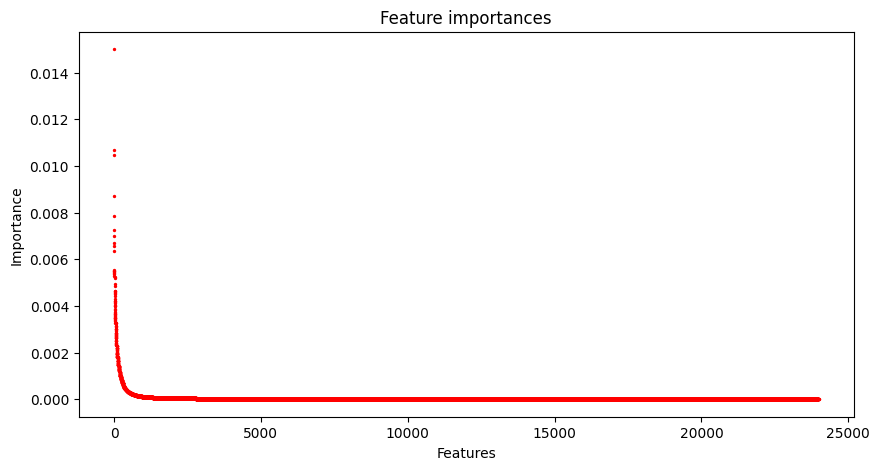

In [ ]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.scatter(range(X_train.shape[1]), importances[indices], color='r', s=2)
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()


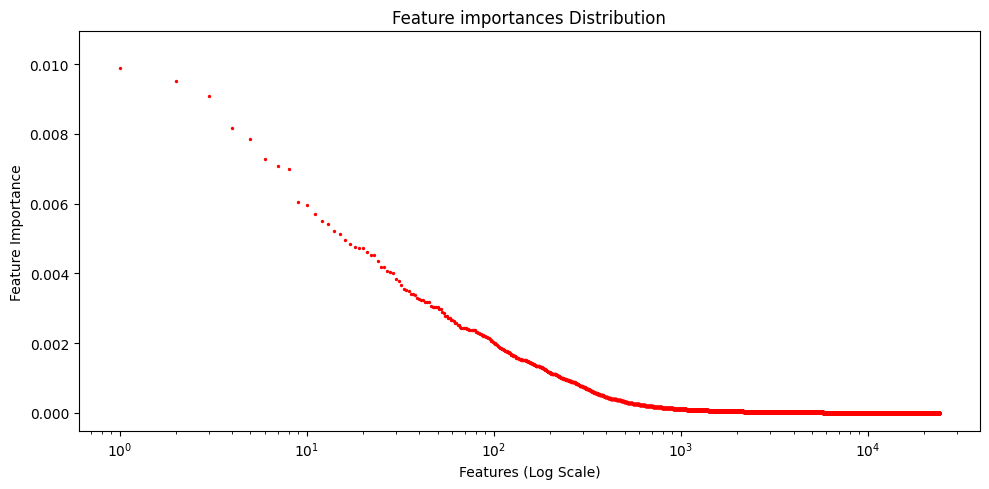

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature importances Distribution")
plt.scatter(range(X_train.shape[1]), importances[indices], color='r', s=2)
plt.xscale("log")  # Set the y-axis to a logarithmic scale
plt.ylabel("Feature Importance")
plt.xlabel("Features (Log Scale)")
plt.savefig("feature_importance_RF")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
importance_series = pd.Series(importances, index=X.columns)

# Prepare an empty list to store accuracy results
accuracy_results = []

# Prepare an empty list to store number of features
features_count = []
for i in [23990,10000,5000,2000,1000,500,300,100,50,30,10,5]:
    # Select the top i features
    top_features = importance_series.sort_values(ascending=False)[:i].index
    df_important = df[top_features]
    X_i = df_important
    y = df['tumourID']

    # Split the data into training and test sets
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_i, y, test_size=0.2, random_state=42)

    # Fit the Random Forest model
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train_i, y_train_i)

    # Predict and evaluate the model
    y_pred_i = model.predict(X_test_i)
    accuracy = accuracy_score(y_test_i, y_pred_i)
    print(f'\nTop {i} Features:')
    print(f'Random Forest Accuracy: {accuracy}')
    class_labels = np.unique(np.concatenate((y_test_i, y_pred_i)))
    class_labels_str = class_labels.astype(str)
    report = classification_report(y_test_i, y_pred_i, target_names=class_labels_str)
    print(report)

    accuracy_results.append(accuracy)
    features_count.append(i)



Top 23990 Features:
Random Forest Accuracy: 0.9603097773475314
              precision    recall  f1-score   support

       SC156       1.00      0.99      0.99       917
       SC162       0.98      0.99      0.99       429
       SC172       0.95      0.86      0.91       487
       SC174       0.88      0.97      0.92       681
       SC177       1.00      0.96      0.98       585

    accuracy                           0.96      3099
   macro avg       0.96      0.95      0.96      3099
weighted avg       0.96      0.96      0.96      3099


Top 10000 Features:
Random Forest Accuracy: 0.9667634720877702
              precision    recall  f1-score   support

       SC156       1.00      0.99      0.99       917
       SC162       0.99      1.00      0.99       429
       SC172       0.96      0.88      0.92       487
       SC174       0.89      0.98      0.94       681
       SC177       1.00      0.96      0.98       585

    accuracy                           0.97      3099
   

In [ ]:

str_num_feature_list = []
for i in range(len(features_count)):
  str_num_feature_list.append(str(features_count[i]))
str_num_feature_list


['23990',
 '10000',
 '5000',
 '2000',
 '1000',
 '500',
 '300',
 '100',
 '50',
 '30',
 '10',
 '5']

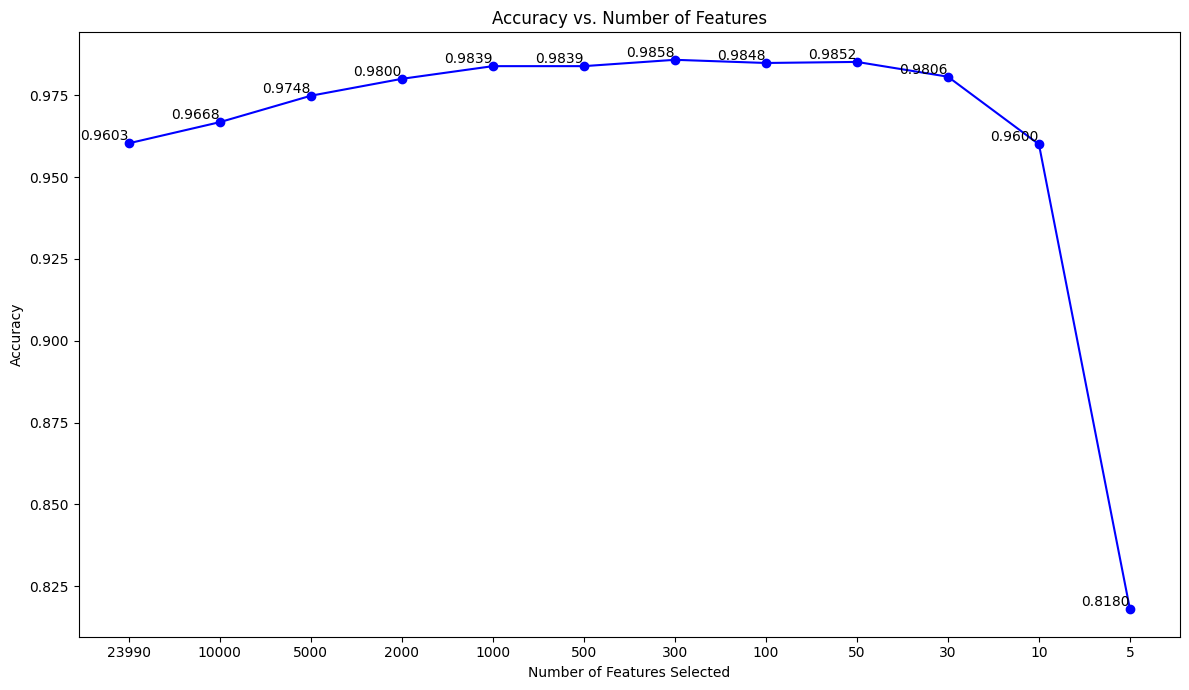

In [ ]:

plt.figure(figsize=(12, 7))
plt.plot(str_num_feature_list, accuracy_results, marker='o', linestyle='-', color='b')

for i, txt in enumerate(accuracy_results):
    plt.text(str_num_feature_list[i], txt, f"{txt:.4f}", ha='right', va='bottom')  # You can adjust 'ha' and 'va' to position the text appropriately

plt.xlabel('Number of Features Selected')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Features')

plt.tight_layout()
plt.savefig("acc_features_importance_rf.png")
plt.show()

In [ ]:
importance_series = pd.Series(importances, index=X.columns)
top_features30 = importance_series.sort_values(ascending=False)[:30].index
top_features30_list = list(top_features30)
top_features30_list

['OGN',
 'RPL8',
 'IGF1',
 'MSMB',
 'RPL41',
 'CST1',
 'KLK3',
 'HLA-B',
 'C1orf64',
 'AGR2',
 'CRISP3',
 'RPS4Y1',
 'RPS2',
 'SPON2',
 'RPL17',
 'TFF3',
 'RPL7A',
 'RPS7',
 'LY6E',
 'KCNN2',
 'RPL15',
 'S100A10',
 'KLK11',
 'THSD7A',
 'SNHG19',
 'LINC01088',
 'RPS12',
 'ADIRF',
 'RPL23',
 'HSD17B6']

In [ ]:

VMR_90_list = ['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC', 'GNLY', 'RP11-21B23.2', 'IGKV1-12', 'MYL1', 'UCMA',
       'CCL19', 'AGXT', 'NTS', 'NKG7', 'GRP', 'WISP3', 'AC012370.3', 'SFRP2',
       'IGHD', 'IGLC3', 'MFAP5', 'GZMB', 'MYH1', 'CCL5', 'CCL3L3', 'TPSB2',
       'CST1', 'TPSAB1', 'RGS5', 'IGFBP7', 'CPA3', 'CD69', 'CCL4', 'CCL3',
       'SPARCL1', 'APOC1', 'ACTA2', 'CD74', 'IFI27', 'APOE', 'RGS1', 'TYROBP',
       'MGP', 'SPARC', 'NPY', 'RGCC', 'TAGLN', 'PLA2G2A', 'HLA-DRA',
       'NDUFA4L2', 'FCER1G', 'S100A4', 'CD52', 'SRGN', 'HIGD1B', 'MSMB',
       'SPON2', 'TFF3', 'MT2A', 'FOSB', 'PCA3', 'ZFP36', 'RPS4Y1', 'EGR1',
       'NFKBIA', 'KLF6', 'JUNB', 'FOS', 'DNAJB1', 'AZGP1', 'B2M', 'SMS',
       'SNHG19', 'FXYD3', 'KLK3', 'SNRPN', 'IGFBP2', 'ITM2B', 'IER2', 'DUSP1',
       'RHOB', 'S100A11', 'RDH11', 'STEAP2', 'HEBP2']

In [ ]:
def compare_lists(list1, list2):
    set1 = set(list1)
    set2 = set(list2)

    common_items = set1.intersection(set2)
    unique_items = set1.symmetric_difference(set2)

    return len(common_items), len(unique_items)

list1 = [1, 2, 3, 4, 5]
list2 = [4, 5, 6, 7, 8]

same_count, different_count = compare_lists(list1, list2)
print(f"Number of same items: {same_count}")
print(f"Number of different items: {different_count}")


Number of same items: 2
Number of different items: 6


In [ ]:
def compare_lists(list1, list2):
    set1 = set(list1)
    set2 = set(list2)

    common_items = set1.intersection(set2)
    unique_items = set1.symmetric_difference(set2)

    return len(common_items), len(unique_items),common_items,unique_items

same_count, different_count,common_items,unique_items = compare_lists(top_features30_list, VMR_90_list)
print(f"Number of same items: {same_count}")
print(f"Number of different items: {different_count}")
print(common_items)
print(unique_items)

Number of same items: 7
Number of different items: 106
{'SNHG19', 'MSMB', 'RPS4Y1', 'TFF3', 'CST1', 'SPON2', 'KLK3'}
{'SMS', 'AGXT', 'SPARCL1', 'SRGN', 'NKG7', 'RPS12', 'TPSAB1', 'IGKV1-12', 'RPL8', 'LINC01088', 'RHOB', 'IGF1', 'ADIRF', 'UCMA', 'SPARC', 'NFKBIA', 'ITM2B', 'RPL15', 'HLA-DRA', 'RPL7A', 'IGLC3', 'MYH2', 'HEBP2', 'S100A4', 'CCL3', 'AGR2', 'CCL3L3', 'APOE', 'WISP3', 'RDH11', 'HIGD1B', 'CCL5', 'IGHD', 'RPS2', 'FXYD3', 'SFRP2', 'AZGP1', 'CD69', 'ACTC1', 'NPY', 'DNAJB1', 'CD52', 'FOS', 'TNNI1', 'IGKC', 'FOSB', 'IL5', 'ZFP36', 'PLA2G2A', 'GNLY', 'RGS1', 'MFAP5', 'ACTA2', 'AC012370.3', 'RPL23', 'MT2A', 'HSD17B6', 'APOC1', 'PCA3', 'KLF6', 'IGFBP2', 'IGFBP7', 'GRP', 'OGN', 'MYH1', 'THSD7A', 'FCER1G', 'RPL17', 'DUSP1', 'NDUFA4L2', 'STEAP2', 'IER2', 'KCNN2', 'MYL1', 'SNRPN', 'C1orf64', 'IFI27', 'RPS7', 'CCL1', 'RGS5', 'JUNB', 'RP11-21B23.2', 'CD74', 'EGR1', 'TAGLN', 'IGLC2', 'S100A11', 'CCR9', 'S100A10', 'RPL41', 'CCL19', 'B2M', 'IGF2-AS', 'RGCC', 'CSRP3', 'LY6E', 'NTS', 'HLA-B', 'K

In [ ]:
common_items_list = list(common_items)
common_items_list


['SNHG19', 'MSMB', 'RPS4Y1', 'TFF3', 'CST1', 'SPON2', 'KLK3']

In [ ]:
    df_important = df[common_items_list]
    X_i = df_important
    y = df['tumourID']

    # Split the data into training and test sets
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_i, y, test_size=0.2, random_state=42)

    # Fit the Random Forest model
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train_i, y_train_i)

    # Predict and evaluate the model
    y_pred_i = model.predict(X_test_i)
    accuracy = accuracy_score(y_test_i, y_pred_i)
    print(f'Random Forest Accuracy: {accuracy}')
    class_labels = np.unique(np.concatenate((y_test_i, y_pred_i)))
    class_labels_str = class_labels.astype(str)
    report = classification_report(y_test_i, y_pred_i, target_names=class_labels_str)
    print(report)

    accuracy_results.append(accuracy)

Random Forest Accuracy: 0.936108422071636
              precision    recall  f1-score   support

       SC156       0.98      0.97      0.97       917
       SC162       0.93      0.97      0.95       429
       SC172       0.93      0.90      0.92       487
       SC174       0.85      0.89      0.87       681
       SC177       0.98      0.95      0.96       585

    accuracy                           0.94      3099
   macro avg       0.93      0.94      0.93      3099
weighted avg       0.94      0.94      0.94      3099



In [ ]:
    df_important = df[unique_items]
    X_i = df_important
    y = df['tumourID']

    # Split the data into training and test sets
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_i, y, test_size=0.2, random_state=42)

    # Fit the Random Forest model
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train_i, y_train_i)

    # Predict and evaluate the model
    y_pred_i = model.predict(X_test_i)
    accuracy = accuracy_score(y_test_i, y_pred_i)
    print(f'Random Forest Accuracy: {accuracy}')
    class_labels = np.unique(np.concatenate((y_test_i, y_pred_i)))
    class_labels_str = class_labels.astype(str)
    report = classification_report(y_test_i, y_pred_i, target_names=class_labels_str)
    print(report)

    accuracy_results.append(accuracy)

<ipython-input-43-ff6286f6477e>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_important = df[unique_items]


Random Forest Accuracy: 0.978702807357212
              precision    recall  f1-score   support

       SC156       1.00      1.00      1.00       917
       SC162       0.98      0.99      0.98       429
       SC172       0.98      0.92      0.95       487
       SC174       0.93      0.98      0.96       681
       SC177       1.00      0.99      1.00       585

    accuracy                           0.98      3099
   macro avg       0.98      0.98      0.98      3099
weighted avg       0.98      0.98      0.98      3099



In [ ]:
    df_important = df[VMR_90_list]
    X_i = df_important
    y = df['tumourID']

    # Split the data into training and test sets
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_i, y, test_size=0.2, random_state=42)

    # Fit the Random Forest model
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train_i, y_train_i)

    # Predict and evaluate the model
    y_pred_i = model.predict(X_test_i)
    accuracy = accuracy_score(y_test_i, y_pred_i)
    print(f'Random Forest Accuracy: {accuracy}')
    class_labels = np.unique(np.concatenate((y_test_i, y_pred_i)))
    class_labels_str = class_labels.astype(str)
    report = classification_report(y_test_i, y_pred_i, target_names=class_labels_str)
    print(report)

    accuracy_results.append(accuracy)

NameError: ignored

In [ ]:
    df_important = df[common_items_list]
    X_i = df_important
    y = df['tumourID']

    # Split the data into training and test sets
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_i, y, test_size=0.2, random_state=42)

    # Fit the Random Forest model
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train_i, y_train_i)

    # Predict and evaluate the model
    y_pred_i = model.predict(X_test_i)
    accuracy = accuracy_score(y_test_i, y_pred_i)
    print(f'Random Forest Accuracy: {accuracy}')
    class_labels = np.unique(np.concatenate((y_test_i, y_pred_i)))
    class_labels_str = class_labels.astype(str)
    report = classification_report(y_test_i, y_pred_i, target_names=class_labels_str)
    print(report)

    accuracy_results.append(accuracy)

Random Forest Accuracy: 0.9357857373346241
              precision    recall  f1-score   support

       SC156       0.98      0.96      0.97       917
       SC162       0.93      0.97      0.95       429
       SC172       0.93      0.90      0.91       487
       SC174       0.85      0.89      0.87       681
       SC177       0.98      0.95      0.96       585

    accuracy                           0.94      3099
   macro avg       0.93      0.93      0.93      3099
weighted avg       0.94      0.94      0.94      3099



# XGBOOST

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# XGBoost
from sklearn.preprocessing import LabelEncoder
# Encode the string labels as integers
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('XGBoost Accuracy:', accuracy_score(y_test, y_pred))

# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)


XGBoost Accuracy: 0.9932236205227493
              precision    recall  f1-score   support

       SC162       1.00      1.00      1.00       917
       SC174       1.00      1.00      1.00       429
       SC172       0.99      0.97      0.98       487
       SC177       0.98      1.00      0.99       681
       SC156       1.00      0.99      1.00       585

    accuracy                           0.99      3099
   macro avg       0.99      0.99      0.99      3099
weighted avg       0.99      0.99      0.99      3099



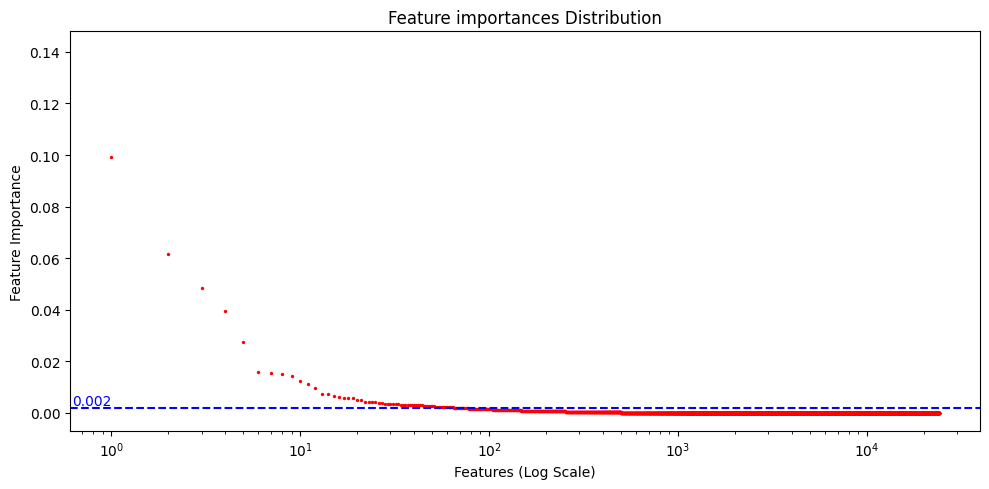

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature importances Distribution")
plt.scatter(range(X_train.shape[1]), importances[indices], color='r', s=2)
plt.xscale("log")  # Set the y-axis to a logarithmic scale
plt.axhline(y=0.002, color='b', linestyle='--') # Add horizontal line at y=0.01
# Add label to the line
plt.text(1, 0.002, '0.002', va='bottom', ha='right', color='b') # Adjust the x value as needed

plt.ylabel("Feature Importance")
plt.xlabel("Features (Log Scale)")
plt.savefig("feature_importance_XGboost")

plt.tight_layout()
plt.show()


In [ ]:


# Find the number of importances greater than 0.01
above_threshold_count = np.sum(importances > 0.002)

print(f"Number of features with importance greater than 0.01: {above_threshold_count}")


Number of features with importance greater than 0.01: 68


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
importance_series = pd.Series(importances, index=X.columns)

# Prepare an empty list to store accuracy results
accuracy_results = []

# Prepare an empty list to store number of features
features_count = []
for i in [10000,5000,2000,1000,500,300,100,50,30,10,5]:
    # Select the top i features
    top_features = importance_series.sort_values(ascending=False)[:i].index
    df_important = df[top_features]
    X_i = df_important
    y = df['tumourID']

    # Encode the string labels as integers
    encoder = LabelEncoder()
    y_encoded = encoder.fit_transform(y)

    # Split the data into training and test sets
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_i, y_encoded, test_size=0.2, random_state=42)

    model = xgb.XGBClassifier()
    model.fit(X_train_i, y_train_i)


    # Predict and evaluate the model
    y_pred_i = model.predict(X_test_i)
    accuracy = accuracy_score(y_test_i, y_pred_i)

    print(f'\nTop {i} Features:')
    print(f'XGBoost Accuracy: {accuracy}')
    class_labels = np.unique(np.concatenate((y_test_i, y_pred_i)))
    class_labels_str = class_labels.astype(str)
    report = classification_report(y_test_i, y_pred_i, target_names=class_labels_str)
    print(report)

    accuracy_results.append(accuracy)
    features_count.append(i)




Top 63 Features:
XGBoost Accuracy: 0.9874152952565344
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       917
           1       1.00      1.00      1.00       429
           2       0.99      0.97      0.98       487
           3       0.96      0.99      0.98       681
           4       0.99      0.98      0.99       585

    accuracy                           0.99      3099
   macro avg       0.99      0.99      0.99      3099
weighted avg       0.99      0.99      0.99      3099



In [ ]:
from sklearn.metrics import accuracy_score, classification_report
importance_series = pd.Series(importances, index=X.columns)
numeric_list = [int(x) for x in ['20126', '15126', '10126', '2308', '1308', '300', '210', '150', '90', '30', '15', '9', '3']]

# Prepare an empty list to store accuracy results
accuracy_results = []

# Prepare an empty list to store number of features
features_count = []
for i in numeric_list:
    # Select the top i features
    top_features = importance_series.sort_values(ascending=False)[:i].index
    df_important = df[top_features]
    X_i = df_important
    y = df['tumourID']

    # Encode the string labels as integers
    encoder = LabelEncoder()
    y_encoded = encoder.fit_transform(y)

    # Split the data into training and test sets
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_i, y_encoded, test_size=0.2, random_state=42)

    model = xgb.XGBClassifier()
    model.fit(X_train_i, y_train_i)


    # Predict and evaluate the model
    y_pred_i = model.predict(X_test_i)
    accuracy = accuracy_score(y_test_i, y_pred_i)

    print(f'\nTop {i} Features:')
    print(f'XGBoost Accuracy: {accuracy}')
    class_labels = np.unique(np.concatenate((y_test_i, y_pred_i)))
    class_labels_str = class_labels.astype(str)
    report = classification_report(y_test_i, y_pred_i, target_names=class_labels_str)
    print(report)

    accuracy_results.append(accuracy)
    features_count.append(i)



Top 20126 Features:
XGBoost Accuracy: 0.9938689899967732
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       917
           1       1.00      1.00      1.00       429
           2       0.99      0.97      0.98       487
           3       0.98      1.00      0.99       681
           4       1.00      0.99      1.00       585

    accuracy                           0.99      3099
   macro avg       0.99      0.99      0.99      3099
weighted avg       0.99      0.99      0.99      3099


Top 15126 Features:
XGBoost Accuracy: 0.9938689899967732
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       917
           1       1.00      1.00      1.00       429
           2       0.99      0.97      0.98       487
           3       0.98      1.00      0.99       681
           4       1.00      0.99      1.00       585

    accuracy                           0.99      3099
   macro avg   

In [ ]:
xgboost_importance

NameError: ignored

In [29]:
num_list = ['all features','20126', '15126', '10126', '2308', '1308', '300', '210', '150', '90', '30', '15', '9', '3']

xgboost_importance = [0.9971,
 0.9938689899967732,
 0.9938689899967732,
 0.9935463052597612,
 0.9938689899967732,
 0.9932236205227493,
 0.9922555663117134,
 0.9919328815747015,
 0.9919328815747015,
 0.9903194578896418,
 0.9757986447241046,
 0.9683768957728299,
 0.9515972894482091,
 0.7654081961923201]
xgboost_vmr = [0.9971,
 0.9938689899967732,
 0.9935463052597612,
 0.9938689899967732,
 0.9925782510487254,
 0.9916101968376896,
 0.9935463052597612,
 0.9906421426266537,
 0.9906421426266537,
 0.9845111326234269,
 0.9532107131332688,
 0.9164246531139078,
 0.877702484672475,
 0.5566311713455954]
print(len(xgboost_importance))
print(len(xgboost_vmr))

14
14


In [30]:
num_list.reverse()
xgboost_importance.reverse()
xgboost_vmr.reverse()

<ipython-input-58-0b6e2045f08f>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


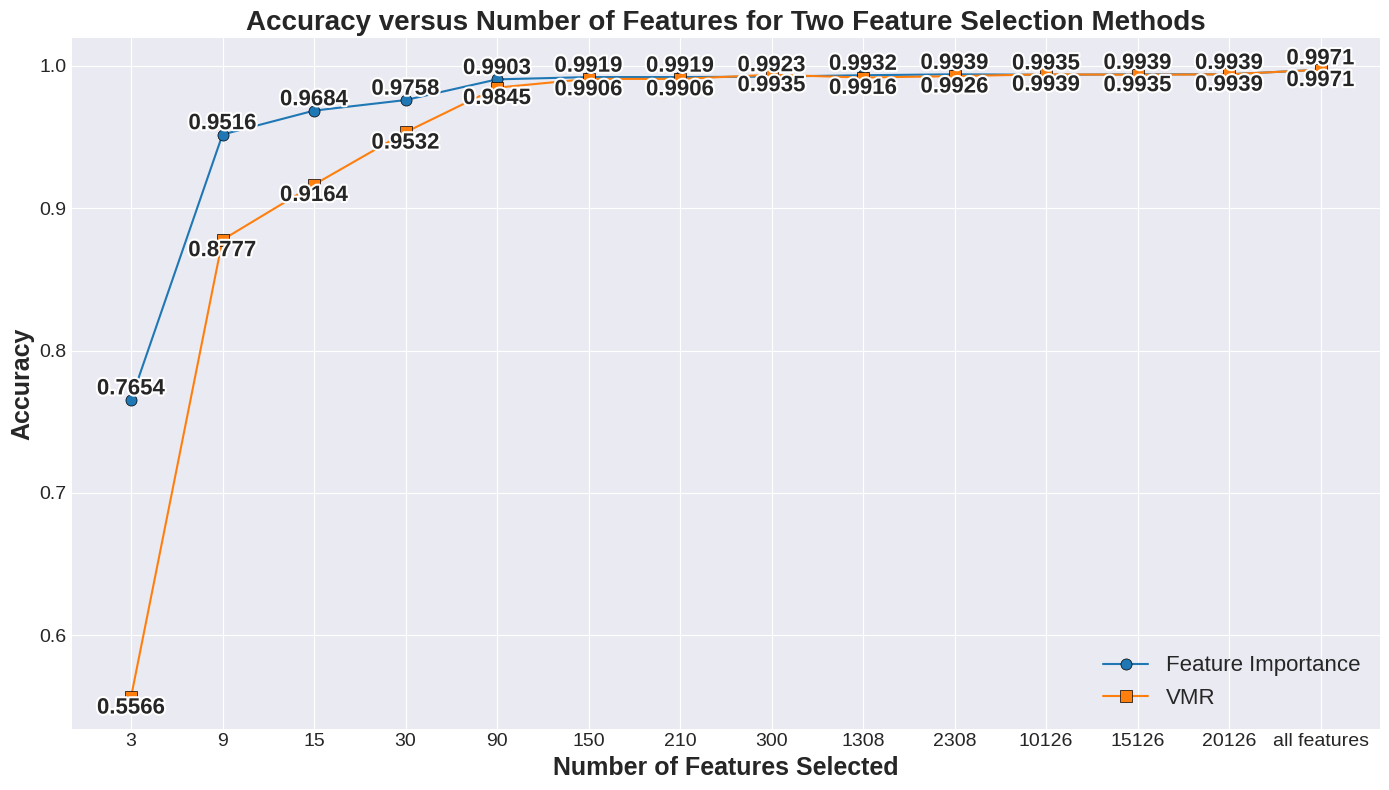

In [58]:
import matplotlib.pyplot as plt
from matplotlib import patheffects

# Setting style
plt.style.use('seaborn-darkgrid')

# Initialize figure
plt.figure(figsize=(14, 8))

# Create a color palette
palette = plt.get_cmap('tab10')

# Plot data with different colors, line styles, and markers
plt.plot(num_list, xgboost_importance, label='Feature Importance', marker='o', linestyle='-', color=palette(0), markersize=8, markeredgecolor='black', markeredgewidth=0.5)
plt.plot(num_list, xgboost_vmr, label='VMR', marker='s', linestyle='-', color=palette(1), markersize=8, markeredgecolor='black', markeredgewidth=0.5)

# Adding a grid
plt.grid(True)

# Function to add labels with offset to prevent overlap
def add_labels(x, y, texts, va='top', offset=0.002):
    for i, txt in enumerate(texts):
        label = plt.text(x[i], y[i] + offset, f"{txt:.4f}", ha='center', va=va, fontsize=16, fontweight='bold')
        label.set_path_effects([patheffects.withStroke(linewidth=3, foreground='white')])  # Adding a white stroke around text for clarity

# Add labels to the plot with alternate vertical alignment for clarity
add_labels(num_list, xgboost_vmr, xgboost_vmr, va='bottom', offset=-0.015)  # Adjust the offset if needed
add_labels(num_list, xgboost_importance, xgboost_importance, va='top', offset=0.015
           )

# Make axis labels and title more prominent
plt.xlabel('Number of Features Selected', fontsize=18, fontweight='bold')
plt.ylabel('Accuracy', fontsize=18, fontweight='bold')
plt.title('Accuracy versus Number of Features for Two Feature Selection Methods', fontsize=20, fontweight='bold')

# Enhance visibility of x-axis values
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)

# Display a legend to identify the lines
plt.legend(fontsize=16, loc='best')

# Apply a tight layout and save the plot as a PNG file
plt.tight_layout()
plt.savefig("importance_versus_vmr.png", dpi=300)  # Increase dpi for better resolution

# Display the plot
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
importance_series = pd.Series(importances, index=X.columns)

for i in [63]:
    # Select the top i features
    top_features = importance_series.sort_values(ascending=False)[:i].index
    df_important = df[top_features]
    X_i = df_important
    y = df['tumourID']

    # Encode the string labels as integers
    encoder = LabelEncoder()
    y_encoded = encoder.fit_transform(y)

    # Split the data into training and test sets
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_i, y_encoded, test_size=0.2, random_state=42)

    model = xgb.XGBClassifier()
    model.fit(X_train_i, y_train_i)


    # Predict and evaluate the model
    y_pred_i = model.predict(X_test_i)
    accuracy = accuracy_score(y_test_i, y_pred_i)

    print(f'\nTop {i} Features:')
    print(f'XGBoost Accuracy: {accuracy}')
    class_labels = np.unique(np.concatenate((y_test_i, y_pred_i)))
    class_labels_str = class_labels.astype(str)
    report = classification_report(y_test_i, y_pred_i, target_names=class_labels_str)
    print(report)

    accuracy_results.append(accuracy)



Top 26 Features:
XGBoost Accuracy: 0.9732171668280091
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       917
           1       0.98      0.99      0.99       429
           2       0.96      0.92      0.94       487
           3       0.93      0.97      0.95       681
           4       0.99      0.98      0.99       585

    accuracy                           0.97      3099
   macro avg       0.97      0.97      0.97      3099
weighted avg       0.97      0.97      0.97      3099



NameError: ignored

In [ ]:

str_num_feature_list = []
for i in range(len(features_count)):
  str_num_feature_list.append(str(features_count[i]))
print(str_num_feature_list)
print(accuracy_results)


['10000', '5000', '2000', '1000', '500', '300', '100', '50', '30', '10', '5']
[0.9929009357857373, 0.9935463052597612, 0.9938689899967732, 0.9935463052597612, 0.9948370442078089, 0.9922555663117134, 0.9912875121006777, 0.9867699257825104, 0.9757986447241046, 0.9632139399806389, 0.8647950951919974]


In [ ]:
len(rf )

11

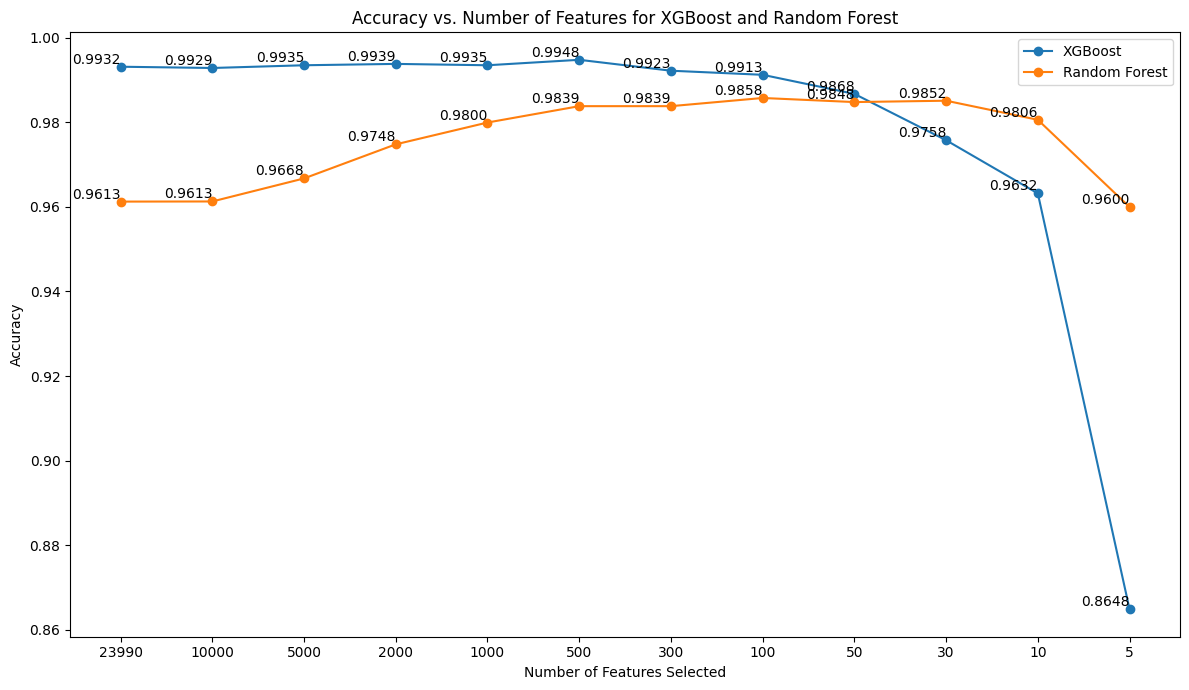

In [ ]:
str_num_feature_list = ['23990','10000', '5000', '2000', '1000', '500', '300', '100', '50', '30' ,'10', '5']
accuracy_results = [0.9932,0.9929009357857373, 0.9935463052597612, 0.9938689899967732, 0.9935463052597612, 0.9948370442078089, 0.9922555663117134, 0.9912875121006777, 0.9867699257825104, 0.9757986447241046,0.9632139399806389, 0.8647950951919974]

rf = [0.9612778315585673,0.9613097773475314,0.9667634720877702, 0.9748305905130688,0.9799935463052598,0.983865763149403,0.983865763149403,0.9858018715714747,0.9848338173604388, 0.9851565020974508,0.9806389157792836, 0.9599870926105195]
plt.figure(figsize=(12, 7))


plt.plot(str_num_feature_list, accuracy_results, label='XGBoost', marker='o', linestyle='-')
plt.plot(str_num_feature_list, rf, label='Random Forest', marker='o', linestyle='-')


for i, txt in enumerate(rf):
    plt.text(str_num_feature_list[i], txt, f"{txt:.4f}", ha='right', va='bottom')  # You can adjust 'ha' and 'va' to position the text appropriately


for i, txt in enumerate(accuracy_results):
    plt.text(str_num_feature_list[i], txt, f"{txt:.4f}", ha='right', va='bottom')  # You can adjust 'ha' and 'va' to position the text appropriately

plt.xlabel('Number of Features Selected')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Features for XGBoost and Random Forest')
plt.legend()
plt.tight_layout()
plt.savefig("acc_features_importance.png")
plt.show()

In [ ]:
importance_series = pd.Series(importances, index=X.columns)
top_features90_xgboost = importance_series.sort_values(ascending=False)[:90].index
top_features90_xgboost_list = list(top_features100_xgboost)
top_features90_xgboost_list

['OGN',
 'CRISP3',
 'ADIRF',
 'HSD17B6',
 'CST1',
 'MSMB',
 'B2M',
 'IGFBP7',
 'SPARCL1',
 'SPON2',
 'SERPINB11',
 'KLK11',
 'SMIM22',
 'IER3',
 'AGR2',
 'RSPO3',
 'MMP7',
 'HSPE1',
 'SLC7A7',
 'ANKRD30A',
 'CRISPLD1',
 'ITGAX',
 'KLK2',
 'SCN1A',
 'PCA3',
 'SLC1A3',
 'CPA3',
 'RPL23',
 'COL6A2',
 'SDCBP',
 'FAM96B',
 'THSD7A',
 'RPS16',
 'IFI16',
 'ACAD8',
 'FGF12',
 'PGAM1',
 'ERVH48-1',
 'ITM2B',
 'TPSB2',
 'RDH10',
 'OMD',
 'HLA-E',
 'KRT8',
 'KLK3',
 'RPS3A',
 'SLC40A1',
 'NTS',
 'PLEKHB2',
 'THYN1',
 'RGS1',
 'KRT17',
 'NDUFV2',
 'XXbac-BPG13B8.10',
 'NEDD4L',
 'RP11-160E2.6',
 'SDPR',
 'BATF',
 'FOLH1',
 'VGLL3',
 'AREG',
 'CCT3',
 'IL1RL1',
 'SPARC',
 'RPS11',
 'MS4A4A',
 'ERRFI1',
 'PKP4',
 'MS4A6A',
 'RGS5',
 'EMP3',
 'RPL14',
 'C15orf48',
 'SYCE1L',
 'GATM',
 'CTSW',
 'IER5',
 'NUCKS1',
 'PSMB1',
 'SRGAP2B',
 'S100A10',
 'ABCC4',
 'COA5',
 'RPL17',
 'RPL41',
 'CXCR4',
 'BRD4',
 'NPY',
 'COX7A2',
 'C1orf64']

In [ ]:

VMR_90_list = ['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC', 'GNLY', 'RP11-21B23.2', 'IGKV1-12', 'MYL1', 'UCMA',
       'CCL19', 'AGXT', 'NTS', 'NKG7', 'GRP', 'WISP3', 'AC012370.3', 'SFRP2',
       'IGHD', 'IGLC3', 'MFAP5', 'GZMB', 'MYH1', 'CCL5', 'CCL3L3', 'TPSB2',
       'CST1', 'TPSAB1', 'RGS5', 'IGFBP7', 'CPA3', 'CD69', 'CCL4', 'CCL3',
       'SPARCL1', 'APOC1', 'ACTA2', 'CD74', 'IFI27', 'APOE', 'RGS1', 'TYROBP',
       'MGP', 'SPARC', 'NPY', 'RGCC', 'TAGLN', 'PLA2G2A', 'HLA-DRA',
       'NDUFA4L2', 'FCER1G', 'S100A4', 'CD52', 'SRGN', 'HIGD1B', 'MSMB',
       'SPON2', 'TFF3', 'MT2A', 'FOSB', 'PCA3', 'ZFP36', 'RPS4Y1', 'EGR1',
       'NFKBIA', 'KLF6', 'JUNB', 'FOS', 'DNAJB1', 'AZGP1', 'B2M', 'SMS',
       'SNHG19', 'FXYD3', 'KLK3', 'SNRPN', 'IGFBP2', 'ITM2B', 'IER2', 'DUSP1',
       'RHOB', 'S100A11', 'RDH11', 'STEAP2', 'HEBP2']

In [ ]:
def compare_lists(list1, list2):
    set1 = set(list1)
    set2 = set(list2)

    common_items = set1.intersection(set2)
    unique_items = set1.symmetric_difference(set2)

    return len(common_items), len(unique_items),common_items,unique_items

same_count, different_count,common_items,unique_items = compare_lists(top_features90_xgboost_list, VMR_90_list)
print(f"Number of same items: {same_count}")
print(f"Number of different items: {different_count}")
print(common_items)
print(unique_items)

Number of same items: 16
Number of different items: 148
{'MSMB', 'KLK3', 'ITM2B', 'RGS5', 'SPARCL1', 'SPARC', 'NTS', 'B2M', 'CST1', 'NPY', 'RGS1', 'SPON2', 'PCA3', 'CPA3', 'IGFBP7', 'TPSB2'}
{'RPS4Y1', 'NDUFV2', 'S100A10', 'JUNB', 'ANKRD30A', 'MYL1', 'KLK2', 'S100A11', 'DUSP1', 'TFF3', 'COA5', 'PKP4', 'MS4A6A', 'CD74', 'NFKBIA', 'MS4A4A', 'IL5', 'ABCC4', 'CD52', 'RGCC', 'GRP', 'FXYD3', 'ACTA2', 'TAGLN', 'GZMB', 'RPS11', 'SLC7A7', 'RP11-21B23.2', 'CCR9', 'RPL14', 'WISP3', 'RPL41', 'FOLH1', 'RDH11', 'HSPE1', 'THSD7A', 'CTSW', 'TPSAB1', 'TYROBP', 'ITGAX', 'CXCR4', 'OMD', 'SDCBP', 'HIGD1B', 'IGKC', 'SMS', 'RSPO3', 'CCL1', 'ZFP36', 'IGF2-AS', 'KRT8', 'PLA2G2A', 'CSRP3', 'APOE', 'ERVH48-1', 'CRISP3', 'FAM96B', 'PSMB1', 'KRT17', 'SNRPN', 'PLEKHB2', 'CD69', 'BATF', 'CCL19', 'VGLL3', 'IFI16', 'AGXT', 'CCL3L3', 'SCN1A', 'MYH2', 'CCL4', 'HSD17B6', 'IL1RL1', 'SRGAP2B', 'HEBP2', 'SRGN', 'EMP3', 'RHOB', 'AGR2', 'CCL3', 'RPS3A', 'SNHG19', 'AC012370.3', 'C1orf64', 'MYH1', 'CCT3', 'IER3', 'S100A4', 'AD

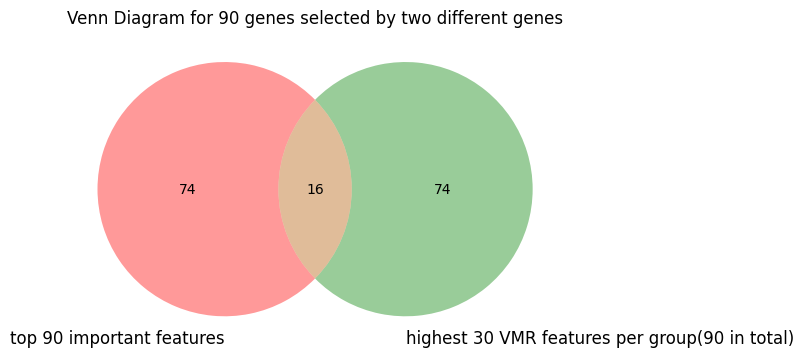

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

def plot_venn(list1, list2):
    set1 = set(list1)
    set2 = set(list2)

    # Using the venn2 function to plot a Venn diagram for two sets
    venn2([set1, set2], ('top 90 important features', 'highest 30 VMR features per group(90 in total)'))

    plt.title("Venn Diagram for 90 genes selected by two different genes")
    plt.show()


plot_venn(top_features90_xgboost_list,VMR_90_list)


In [ ]:
df_final = df
display(df_final)

,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC145212.2,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,AACGTTGCATCGGACC-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,GGACGTCCAACACCTA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547
4,TACGGGCCATGCAACT-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15491,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15492,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15493,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,0.0,0.0,0.505,0.505,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [ ]:
# feature selection by identifying top 1000 highly variable genes for each group

# Separate numerical and non-numerical columns
df_numeric = df_final.select_dtypes(include=np.number)
df_non_numeric = df_final.select_dtypes(exclude=np.number)


# Compute mean and variance for each gene
mean_expression = df_numeric.mean()
variance_expression = df_numeric.var()

# Compute the variance-to-mean ratio (VMR)
vmr = variance_expression / mean_expression
# Calculate the max VMR
max_vmr = vmr.max()

# Calculate the min VMR
min_vmr = vmr.min()

print("Max VMR:", max_vmr)
print("Min VMR:", min_vmr)




Max VMR: 3.84827255587954
Min VMR: 0.08548259767673895


In [ ]:

# Categorize genes into groups based on mean expression
bins = bins = [0,0.1,1,6]
groups = pd.cut(mean_expression, bins=bins)

# Create a DataFrame with VMR and groups
vmr_df = pd.DataFrame({'vmr': vmr, 'group': groups})
display(vmr_df)

,vmr,group
RP11-34P13.7,0.710797,"(0.0, 0.1]"
RP11-34P13.8,0.568170,"(0.0, 0.1]"
FO538757.2,0.905190,"(0.0, 0.1]"
AP006222.2,0.755794,"(0.0, 0.1]"
RP4-669L17.10,0.709255,"(0.0, 0.1]"
...,...,...
BX072566.1,0.328718,"(0.0, 0.1]"
AL354822.1,0.642319,"(0.0, 0.1]"
AC023491.2,0.304000,"(0.0, 0.1]"
AC004556.1,0.561487,"(0.0, 0.1]"


In [ ]:
# Count the number of occurrences of each unique value in the 'feature_group' column
counts = vmr_df['group'].value_counts()

print(counts)


(0.0, 0.1]    18864
(0.1, 1.0]     4818
(1.0, 6.0]      308
Name: group, dtype: int64


In [ ]:
selected_genes = vmr_df.groupby('group')['vmr'].nlargest(100)
selected_genes_indices = selected_genes.index.get_level_values(1)
print(len(selected_genes_indices))
print(selected_genes_indices)


300
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC',
       ...
       'ATP5G3', 'HMGN2', 'MIF', 'MPC2', 'CST3', 'ATP5J2', 'HMGN1', 'CD9',
       'TOMM20', 'CALR'],
      dtype='object', length=300)


In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
# Create lists to store results
acc_list_XGB = []
num_high_list_XGB = []
num_feature_list_XGB = []

for i in [21]:
    print(i)
    num_high_list_XGB.append(i)
    # For each group, select the top i genes with the highest VMR
    selected_genes = vmr_df.groupby('group')['vmr'].nlargest(i)
    # Filter the original DataFrame to keep only the selected genes
    selected_genes_indices = selected_genes.index.get_level_values(1)
    selected_genes_df = df_numeric[selected_genes_indices]

    print(len(selected_genes_indices))
    num_feature_list_XGB.append(len(selected_genes_indices))
    print(selected_genes_indices)

    # Concatenate the numerical and non-numerical data
    df_hvg = pd.concat([selected_genes_df, df_non_numeric], axis=1)
    X = df_hvg.drop(['reference','tumourID','CellType'], axis=1)
    y = df_hvg['tumourID']

    # Split the data into training and test sets
    encoder = LabelEncoder()
    y_encoded = encoder.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


    # Use XGBoost Classifier
    model = XGBClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print results
    print('XGBoost Accuracy:', accuracy_score(y_test, y_pred))
    class_labels = y.unique()
    report = classification_report(y_test, y_pred, target_names=class_labels)
    print(report)

    acc_list_XGB.append(accuracy_score(y_test, y_pred))


21
63
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC', 'GNLY', 'RP11-21B23.2', 'IGKV1-12', 'MYL1', 'UCMA',
       'CCL19', 'AGXT', 'NTS', 'NKG7', 'GRP', 'WISP3', 'TPSB2', 'CST1',
       'TPSAB1', 'RGS5', 'IGFBP7', 'CPA3', 'CD69', 'CCL4', 'CCL3', 'SPARCL1',
       'APOC1', 'ACTA2', 'CD74', 'IFI27', 'APOE', 'RGS1', 'TYROBP', 'MGP',
       'SPARC', 'NPY', 'RGCC', 'MSMB', 'SPON2', 'TFF3', 'MT2A', 'FOSB', 'PCA3',
       'ZFP36', 'RPS4Y1', 'EGR1', 'NFKBIA', 'KLF6', 'JUNB', 'FOS', 'DNAJB1',
       'AZGP1', 'B2M', 'SMS', 'SNHG19', 'FXYD3', 'KLK3', 'SNRPN'],
      dtype='object')
XGBoost Accuracy: 0.979025492094224
              precision    recall  f1-score   support

       SC162       0.99      0.99      0.99       917
       SC174       0.99      0.99      0.99       429
       SC172       0.97      0.96      0.96       487
       SC177       0.95      0.97      0.96       681
       SC156       0.99      0.99      0.99       585

    accur

In [ ]:

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

importance_series = pd.Series(importances, index=X.columns)
top_features210_xgboost = importance_series.sort_values(ascending=False)[:300].index
top_features210_xgboost_list = list(top_features210_xgboost)
top_features210_xgboost_list

['OGN',
 'CRISP3',
 'ADIRF',
 'HSD17B6',
 'CST1',
 'MSMB',
 'B2M',
 'IGFBP7',
 'SPARCL1',
 'SPON2',
 'SERPINB11',
 'KLK11',
 'SMIM22',
 'IER3',
 'AGR2',
 'RSPO3',
 'MMP7',
 'HSPE1',
 'SLC7A7',
 'ANKRD30A',
 'CRISPLD1',
 'ITGAX',
 'KLK2',
 'SCN1A',
 'PCA3',
 'SLC1A3',
 'CPA3',
 'RPL23',
 'COL6A2',
 'SDCBP',
 'FAM96B',
 'THSD7A',
 'RPS16',
 'IFI16',
 'ACAD8',
 'FGF12',
 'PGAM1',
 'ERVH48-1',
 'ITM2B',
 'TPSB2',
 'RDH10',
 'OMD',
 'HLA-E',
 'KRT8',
 'KLK3',
 'RPS3A',
 'SLC40A1',
 'NTS',
 'PLEKHB2',
 'THYN1',
 'RGS1',
 'KRT17',
 'NDUFV2',
 'XXbac-BPG13B8.10',
 'NEDD4L',
 'RP11-160E2.6',
 'SDPR',
 'BATF',
 'FOLH1',
 'VGLL3',
 'AREG',
 'CCT3',
 'IL1RL1',
 'SPARC',
 'RPS11',
 'MS4A4A',
 'ERRFI1',
 'PKP4',
 'MS4A6A',
 'RGS5',
 'EMP3',
 'RPL14',
 'C15orf48',
 'SYCE1L',
 'GATM',
 'CTSW',
 'IER5',
 'NUCKS1',
 'PSMB1',
 'SRGAP2B',
 'S100A10',
 'ABCC4',
 'COA5',
 'RPL17',
 'RPL41',
 'CXCR4',
 'BRD4',
 'NPY',
 'COX7A2',
 'C1orf64',
 'S100A4',
 'RPL37',
 'CRIP1',
 'RPL7A',
 'IGSF6',
 'FGF1',
 'TUSC3'

In [ ]:
selected_genes = vmr_df.groupby('group')['vmr'].nlargest(100)
selected_genes_indices = selected_genes.index.get_level_values(1)
print(len(selected_genes_indices))
print(selected_genes_indices)


300
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC',
       ...
       'ATP5G3', 'HMGN2', 'MIF', 'MPC2', 'CST3', 'ATP5J2', 'HMGN1', 'CD9',
       'TOMM20', 'CALR'],
      dtype='object', length=300)


In [ ]:
def compare_lists(list1, list2):
    set1 = set(list1)
    set2 = set(list2)

    common_items = set1.intersection(set2)
    unique_items = set1.symmetric_difference(set2)

    return len(common_items), len(unique_items),common_items,unique_items

same_count, different_count,common_items,unique_items = compare_lists(top_features210_xgboost_list, selected_genes_indices)
print(f"Number of same items: {same_count}")
print(f"Number of different items: {different_count}")
print(common_items)
print(unique_items)

Number of same items: 63
Number of different items: 474
{'IGF1', 'CXCR4', 'SPARC', 'ENG', 'TYROBP', 'C1orf64', 'ADIRF', 'KRT18', 'KLK11', 'ITM2B', 'NFKBIA', 'HLA-A', 'S100A4', 'S100A11', 'COL4A2', 'EMP3', 'VGLL3', 'HSPA1A', 'CLU', 'SNHG19', 'KLK3', 'AZGP1', 'SPON2', 'HLA-DRB5', 'CPA3', 'GPX1', 'RGS1', 'HLA-E', 'KLK2', 'SPRY1', 'FOS', 'B2M', 'RGS5', 'CST1', 'TSPAN1', 'CPM', 'HLA-B', 'BRI3', 'FGF12', 'EGR1', 'SDPR', 'PCA3', 'TFF3', 'KRT8', 'OGN', 'PLA2G2A', 'H2AFJ', 'TPSB2', 'FOSB', 'CRIP1', 'NPY', 'RPL17', 'CST3', 'THYN1', 'SPARCL1', 'AREG', 'DBI', 'FLT1', 'MSMB', 'MZT2B', 'NTS', 'HLA-DRB1', 'IGFBP7'}
{'DCXR', 'BAG1', 'FOLH1', 'SMAP2', 'A2M', 'TMEM108-AS1', 'GSN', 'MESP1', 'PKIB', 'MS4A2', 'IGSF6', 'AC007325.1', 'CCT3', 'OMD', 'RCAN1', 'ADAMTSL2', 'PRRX1', 'COMMD6', 'TSC22D3', 'RPS7', 'NUDT14', 'IGKV3-20', 'KDELR2', 'CD37', 'PLPP2', 'MS4A6A', 'MT1G', 'YME1L1', 'CCL3', 'PKP4', 'LYZ', 'CTSG', 'NFKB1', 'GDI2', 'STX3', 'C7orf55-LUC7L2', 'NUPR1', 'RHOC', 'PRAC1', 'BIRC3', 'SYT10', 'ITGB2', '

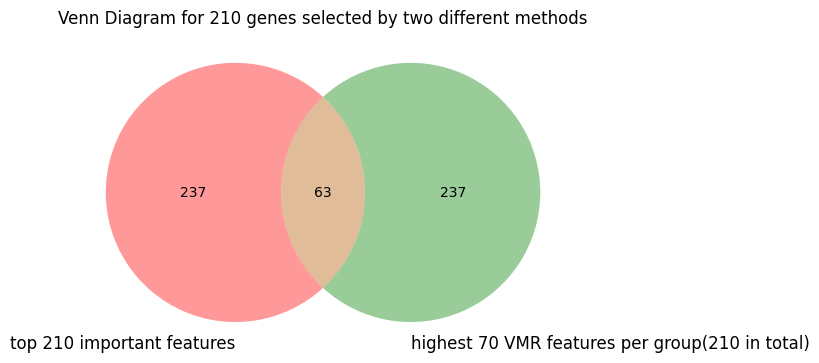

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

def plot_venn(list1, list2):
    set1 = set(list1)
    set2 = set(list2)

    # Using the venn2 function to plot a Venn diagram for two sets
    venn2([set1, set2], ('top 210 important features', 'highest 70 VMR features per group(210 in total)'))

    plt.title("Venn Diagram for 210 genes selected by two different methods")
    plt.savefig("gene_compare.png")
    plt.show()


plot_venn(top_features210_xgboost_list,selected_genes_indices)


In [ ]:
df_important = df[common_items]
X_i = df_important
y = df['tumourID']

    # Encode the string labels as integers
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

    # Split the data into training and test sets
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_i, y_encoded, test_size=0.2, random_state=42)

model = xgb.XGBClassifier()
model.fit(X_train_i, y_train_i)


# Predict and evaluate the model
y_pred_i = model.predict(X_test_i)
accuracy = accuracy_score(y_test_i, y_pred_i)

print(f'XGBoost Accuracy: {accuracy}')
class_labels = np.unique(np.concatenate((y_test_i, y_pred_i)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test_i, y_pred_i, target_names=class_labels_str)
print(report)

<ipython-input-68-0af373efc502>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_important = df[common_items]


XGBoost Accuracy: 0.9903194578896418
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       917
           1       0.99      1.00      1.00       429
           2       0.99      0.98      0.98       487
           3       0.98      0.99      0.98       681
           4       0.99      0.99      0.99       585

    accuracy                           0.99      3099
   macro avg       0.99      0.99      0.99      3099
weighted avg       0.99      0.99      0.99      3099



In [ ]:
# XGBoost
from sklearn.preprocessing import LabelEncoder
# Encode the string labels as integers
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('XGBoost Accuracy:', accuracy_score(y_test, y_pred))

# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)

In [ ]:

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

importance_series = pd.Series(importances, index=X.columns)
top_features210_xgboost = importance_series.sort_values(ascending=False)[:150].index
top_features210_xgboost_list = list(top_features210_xgboost)

print(len(top_features210_xgboost_list))

150


In [ ]:
selected_genes = vmr_df.groupby('group')['vmr'].nlargest(50)
selected_genes_indices = selected_genes.index.get_level_values(1)
print(len(selected_genes_indices))
print(selected_genes_indices)


150
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC',
       ...
       'RPL17', 'SOX4', 'HERPUD1', 'SORD', 'KRT18', 'TRPM4', 'DCXR', 'TMPRSS2',
       'BTG1', 'H2AFJ'],
      dtype='object', length=150)


In [ ]:
def compare_lists(list1, list2):
    set1 = set(list1)
    set2 = set(list2)

    common_items = set1.intersection(set2)
    unique_items = set1.symmetric_difference(set2)

    return len(common_items), len(unique_items),common_items,unique_items

same_count, different_count,common_items,unique_items = compare_lists(top_features210_xgboost_list, selected_genes_indices)
print(f"Number of same items: {same_count}")
print(f"Number of different items: {different_count}")
print(common_items)
print(unique_items)

Number of same items: 26
Number of different items: 248
{'CXCR4', 'SPARC', 'ADIRF', 'KRT18', 'ITM2B', 'S100A4', 'KLK3', 'AZGP1', 'SPON2', 'CPA3', 'RGS1', 'B2M', 'RGS5', 'CST1', 'EGR1', 'PCA3', 'PLA2G2A', 'TPSB2', 'NPY', 'RPL17', 'SPARCL1', 'AREG', 'MSMB', 'NTS', 'HLA-DRB1', 'IGFBP7'}
{'IER2', 'DCXR', 'BRD4', 'BAG1', 'FOLH1', 'A2M', 'PKIB', 'MESP1', 'VIM', 'S100A11', 'IGSF6', 'EMP3', 'GATA2', 'CCT3', 'CLEC3A', 'RSPO3', 'OMD', 'IGKV1-12', 'DNAJA1', 'RDH10', 'VASH1', 'HLA-DRA', 'DHRS7', 'COL6A2', 'IGLC2', 'IGKV3-20', 'HLA-E', 'KLK2', 'FOS', 'MS4A6A', 'TUSC3', 'YME1L1', 'CCL3', 'SFRP2', 'LECT1', 'PKP4', 'LYZ', 'CTSG', 'NFKB1', 'GDI2', 'SDPR', 'C15orf48', 'STX3', 'RPS16', 'NUPR1', 'DNAJB1', 'PRAC1', 'MYL9', 'CRIP1', 'IL1RL1', 'SLC7A7', 'TNNI2', 'KRT17', 'IL7R', 'LTF', 'SNRPN', 'RPL18A', 'CCL19', 'PSMB1', 'COL4A1', 'KXD1', 'CD52', 'ALOX5AP', 'UCMA', 'FXYD3', 'C1QB', 'ACTC1', 'FAM96B', 'MEAF6', 'PMEPA1', 'CTSW', 'SRGAP2B', 'GNG11', 'IGKC', 'MYH1', 'SORD', 'MGP', 'CCL3L3', 'RP11-456O19.2', 'SN

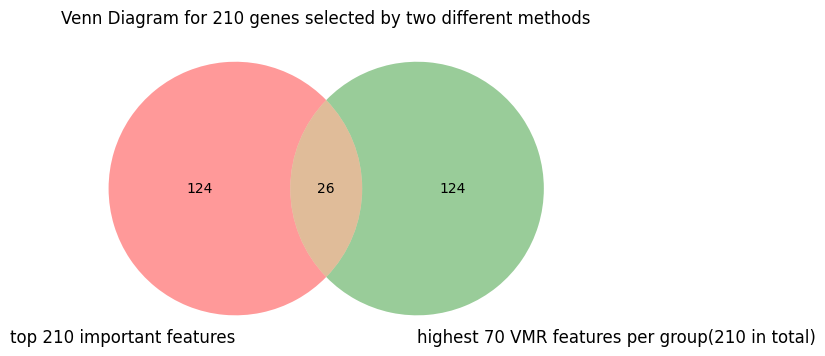

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

def plot_venn(list1, list2):
    set1 = set(list1)
    set2 = set(list2)

    # Using the venn2 function to plot a Venn diagram for two sets
    venn2([set1, set2], ('top 210 important features', 'highest 70 VMR features per group(210 in total)'))

    plt.title("Venn Diagram for 210 genes selected by two different methods")
    plt.savefig("gene_compare150.png")
    plt.show()


plot_venn(top_features210_xgboost_list,selected_genes_indices)


In [ ]:
df_important = df[common_items]
X_i = df_important
y = df['tumourID']

    # Encode the string labels as integers
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

    # Split the data into training and test sets
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_i, y_encoded, test_size=0.2, random_state=42)

model150 = xgb.XGBClassifier()
model150.fit(X_train_i, y_train_i)


# Predict and evaluate the model
y_pred_i = model150.predict(X_test_i)
accuracy = accuracy_score(y_test_i, y_pred_i)

print(f'XGBoost Accuracy: {accuracy}')
class_labels = np.unique(np.concatenate((y_test_i, y_pred_i)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test_i, y_pred_i, target_names=class_labels_str)
print(report)

<ipython-input-54-fbc456ff8b45>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_important = df[common_items]


XGBoost Accuracy: 0.9835430784123911
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       917
           1       0.99      0.99      0.99       429
           2       0.97      0.96      0.97       487
           3       0.97      0.99      0.98       681
           4       0.99      0.98      0.99       585

    accuracy                           0.98      3099
   macro avg       0.98      0.98      0.98      3099
weighted avg       0.98      0.98      0.98      3099



In [ ]:
# XGBoost
from sklearn.preprocessing import LabelEncoder
# Encode the string labels as integers
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('XGBoost Accuracy:', accuracy_score(y_test, y_pred))

# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)

# svm

##svm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


model = LinearSVC(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Linear SVM Accuracy:', accuracy_score(y_test, y_pred))
# Now get the unique class labels
class_labels = y.unique()
# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)
print(report)


Linear SVM Accuracy: 0.9970958373668926
              precision    recall  f1-score   support

       SC162       1.00      1.00      1.00       917
       SC174       1.00      1.00      1.00       429
       SC172       0.99      0.99      0.99       487
       SC177       1.00      1.00      1.00       681
       SC156       1.00      1.00      1.00       585

    accuracy                           1.00      3099
   macro avg       1.00      1.00      1.00      3099
weighted avg       1.00      1.00      1.00      3099



[[917   0   0   0   0]
 [  0 429   0   0   0]
 [  0   1 483   3   0]
 [  1   0   2 678   0]
 [  0   0   2   0 583]]


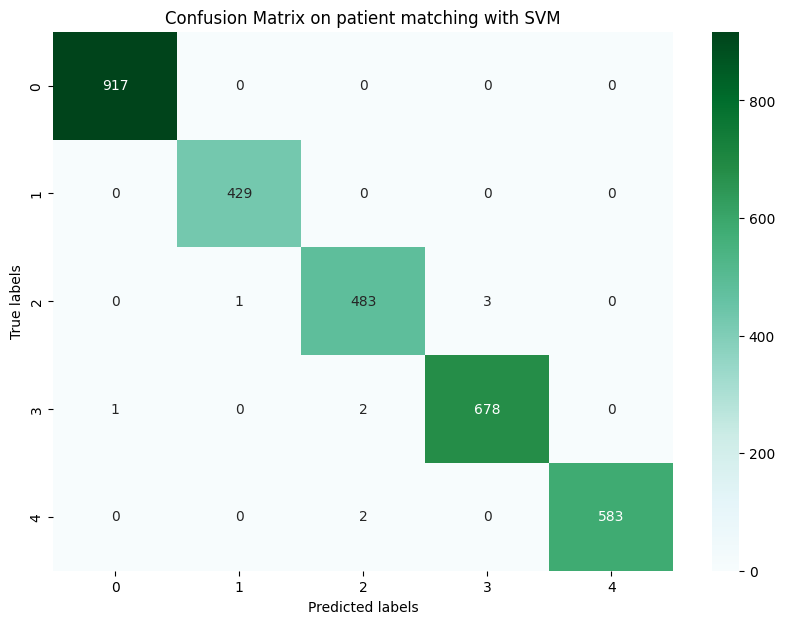

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='BuGn')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix on patient matching with SVM')
plt.savefig("smv_pm.png")
plt.show()


In [ ]:
from sklearn.svm import SVC

# Assume you have your data X_train, y_train loaded
# and a list feature_names with the names of your features

feature_names = X_train.columns.tolist()
# 2. Rank features based on absolute weights
feature_weights = model.coef_[0]
ranked_features_indices = sorted(range(len(feature_weights)), key=lambda i: abs(feature_weights[i]), reverse=True)

# 3. Map numerical indices to actual feature names
ranked_feature_names = [feature_names[i] for i in ranked_features_indices]

# 4. Select top 100 feature names
top_100_feature_names = ranked_feature_names[:100]

print("Top 100 features:", top_100_feature_names)
# Filter your training data using these indices
X_train_top_100 = X_train[top_100_feature_names]

# Do the same for the test set or any other dataset you want to filter
X_test_top_100 = X_test[top_100_feature_names]
# Using only the top 100 features to train a new SVM model

svm_model_top_100 = LinearSVC(max_iter=10000)
svm_model_top_100.fit(X_train_top_100, y_train)

# If you have a test set:
# Evaluate its performance
accuracy_top_100 = svm_model_top_100.score(X_test_top_100, y_test)
print(f"Accuracy with top 100 features: {accuracy_top_100:.5f}")


Top 100 features: ['RPL41', 'RPL17', 'TFF3', 'MSMB', 'PPDPF', 'RPS24', 'KLK11', 'ADIRF', 'KLK12', 'OGN', 'RPS4Y1', 'IGF1', 'MT2A', 'NBEAL1', 'TMBIM4', 'HLA-DRB1', 'ZBTB16', 'IGFBP3', 'RPL39', 'HLA-DRB5', 'SPRY1', 'TMSB4X', 'CPM', 'PLA2G2A', 'C15orf48', 'VIM', 'RPL34', 'RPL13', 'THSD7A', 'HOPX', 'RPS25', 'ITM2B', 'FXYD3', 'FKBP5', 'NPY', 'AGR2', 'IER3', 'B2M', 'SAT1', 'RPS20', 'CST1', 'ENPP2', 'G0S2', 'TPT1', 'LY6E', 'PRSS23', 'MIPEP', 'NUDT4', 'VGLL3', 'SNHG19', 'PRAC1', 'RPL9', 'MALAT1', 'GDF15', 'SMIM22', 'RPSA', 'RPS3', 'CXCL8', 'RPS6', 'SOX4', 'MAP1LC3B', 'EIF5', 'CAMK2N1', 'FABP5', 'ANK3', 'RPL26', 'NDUFS5', 'CPE', 'HES4', 'MZT2B', 'CANX', 'BRI3', 'C11orf96', 'CHMP4B', 'IFI16', 'SNHG25', 'NCL', 'RHOB', 'BRD2', 'ELK4', 'JUNB', 'LDHA', 'ANPEP', 'EIF3H', 'UQCR11', 'SMDT1', 'AMD1', 'MPC2', 'RPL14', 'HINT1', 'ATP1A1', 'NUCB2', 'CCNI', 'RPS21', 'LTBP1', 'MTDH', 'NUDT8', 'BTG2', 'AC090498.1', 'RPL35A']
Accuracy with top 100 features: 0.98483


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


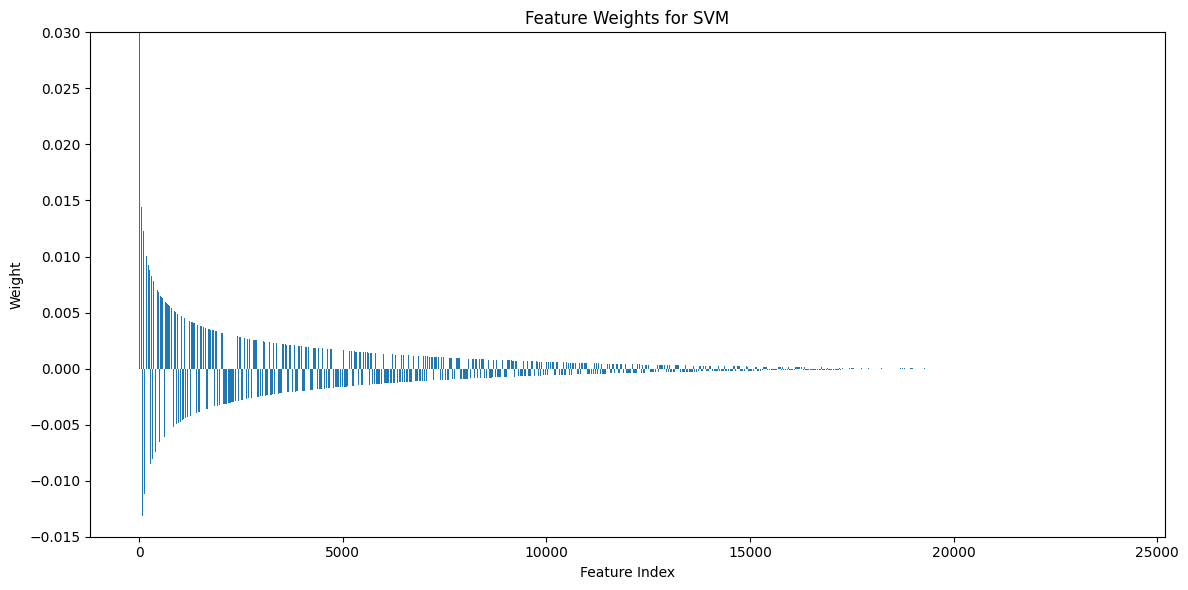

In [ ]:
import matplotlib.pyplot as plt

feature_weights = model.coef_[0]
ranked_features_indices = sorted(range(len(feature_weights)), key=lambda i: abs(feature_weights[i]), reverse=True)

# Getting the ranked feature weights
ranked_weights = [feature_weights[i] for i in ranked_features_indices]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(range(len(ranked_weights)), ranked_weights, align='center')

plt.xlabel('Feature Index')
plt.ylabel('Weight')
plt.title('Feature Weights for SVM')
plt.ylim(-0.015, 0.03) # Setting the y-range from -0.2 to 0.2
plt.savefig("svm_importance")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.svm import LinearSVC

# List of numbers of top features to test
top_features_list = [10000, 5000, 2000, 1000, 500, 300, 100, 50, 30, 10, 5]
svm_acc_list = []
str_svm_acc_list = []
# Assume you have your data X_train, y_train loaded
# and a list feature_names with the names of your features
feature_names = X_train.columns.tolist()

# Rank features based on absolute weights
feature_weights = model.coef_[0]
ranked_features_indices = sorted(range(len(feature_weights)), key=lambda i: abs(feature_weights[i]), reverse=True)

# Map numerical indices to actual feature names
ranked_feature_names = [feature_names[i] for i in ranked_features_indices]

# Loop through the different numbers of top features and evaluate the model
for top_features in top_features_list:
    # Select the top feature names
    top_feature_names = ranked_feature_names[:top_features]

    # Filter your training and test data using these indices
    X_train_top = X_train[top_feature_names]
    X_test_top = X_test[top_feature_names]

    # Using only the top features to train a new SVM model
    svm_model_top = LinearSVC(max_iter=10000)
    svm_model_top.fit(X_train_top, y_train)

    # Evaluate its performance
    accuracy_top = svm_model_top.score(X_test_top, y_test)
    print(f"Accuracy with top {top_features} features: {accuracy_top:.5f}")
    svm_acc_list.append(accuracy_top)
    str_svm_acc_list.append(str(accuracy_top))

Accuracy with top 10000 features: 0.99677
Accuracy with top 5000 features: 0.99645
Accuracy with top 2000 features: 0.99451
Accuracy with top 1000 features: 0.99193
Accuracy with top 500 features: 0.99064


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy with top 300 features: 0.98483


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy with top 100 features: 0.98483
Accuracy with top 50 features: 0.98096
Accuracy with top 30 features: 0.93611
Accuracy with top 10 features: 0.84995
Accuracy with top 5 features: 0.64763


In [ ]:
print(svm_acc_list)

[0.9967731526298806, 0.9964504678928686, 0.994514359470797, 0.9919328815747015, 0.9906421426266537, 0.9848338173604388, 0.9848338173604388, 0.9809616005162956, 0.936108422071636, 0.8499515972894482, 0.6476282671829623]


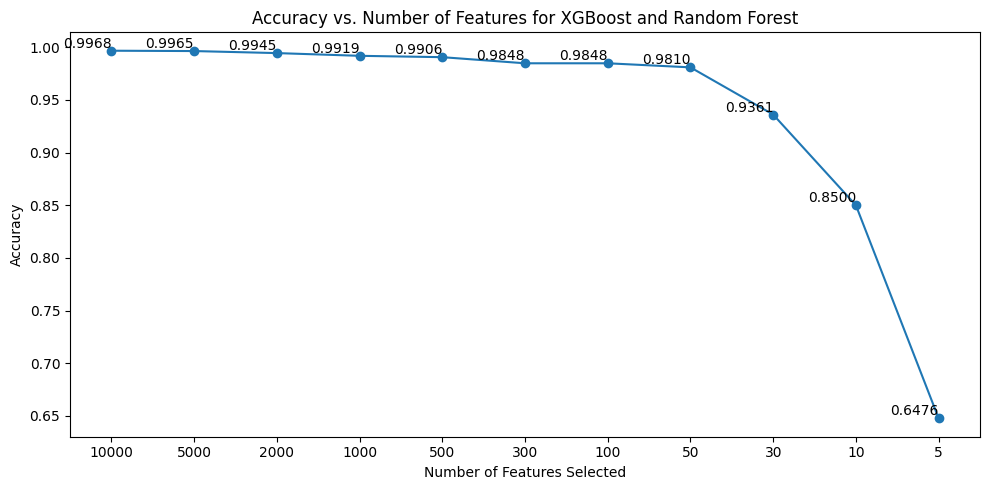

In [ ]:
top_features_list= ['10000', '5000', '2000', '1000', '500', '300', '100', '50', '30', '10', '5']
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(top_features_list, svm_acc_list, marker='o')


for i, txt in enumerate(svm_acc_list):
    plt.text(top_features_list[i], txt, f"{txt:.4f}", ha='right', va='bottom')  # You can adjust 'ha' and 'va' to position the text appropriately

plt.xlabel('Number of Features Selected')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Features for XGBoost and Random Forest')

plt.tight_layout()
plt.savefig("acc_features_importance.png")
plt.show()

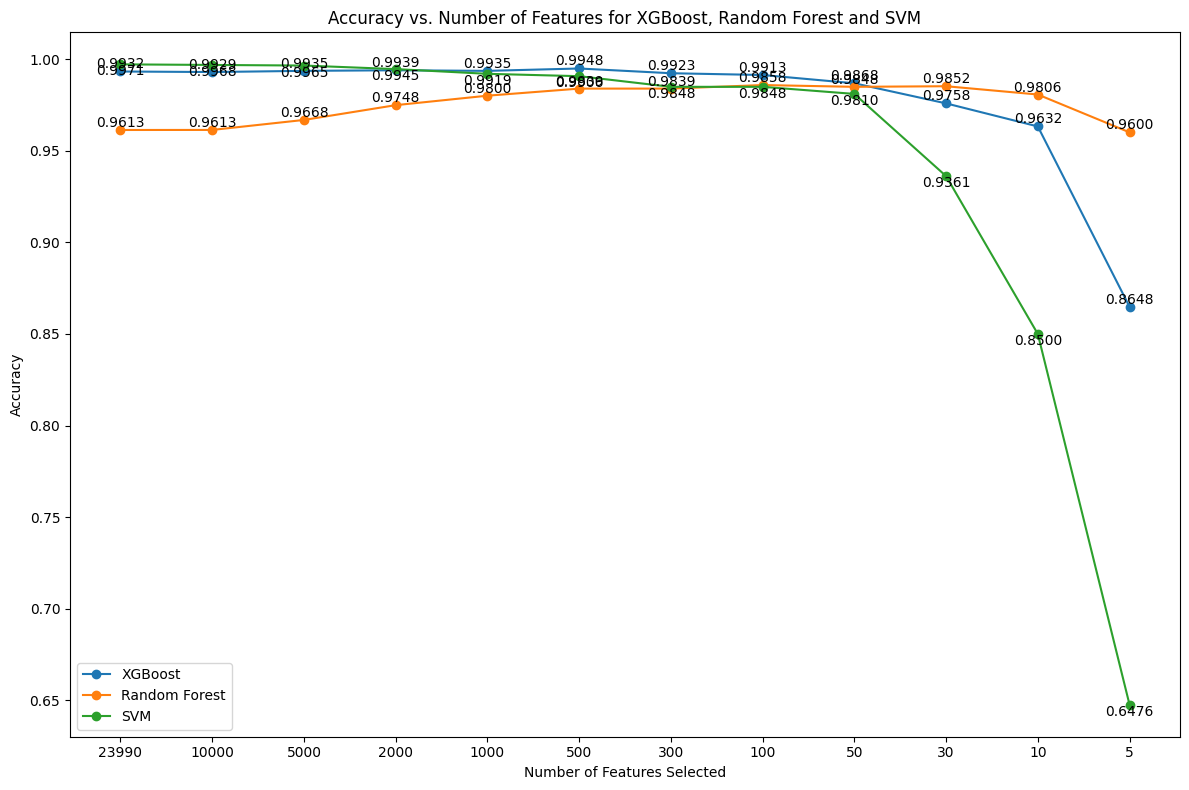

In [ ]:
str_num_feature_list = ['23990','10000', '5000', '2000', '1000', '500', '300', '100', '50', '30' ,'10', '5']
xgboost = [0.9932,0.9929009357857373, 0.9935463052597612, 0.9938689899967732, 0.9935463052597612, 0.9948370442078089, 0.9922555663117134, 0.9912875121006777, 0.9867699257825104, 0.9757986447241046,0.9632139399806389, 0.8647950951919974]

rf = [0.9612778315585673,0.9613097773475314,0.9667634720877702, 0.9748305905130688,0.9799935463052598,0.983865763149403,0.983865763149403,0.9858018715714747,0.9848338173604388, 0.9851565020974508,0.9806389157792836, 0.9599870926105195]
svm = [0.9971, 0.9967731526298806, 0.9964504678928686, 0.994514359470797, 0.9919328815747015, 0.9906421426266537, 0.9848338173604388, 0.9848338173604388, 0.9809616005162956, 0.936108422071636, 0.8499515972894482, 0.6476282671829623]

plt.figure(figsize=(12, 8))


plt.plot(str_num_feature_list, xgboost, label='XGBoost', marker='o', linestyle='-')
plt.plot(str_num_feature_list, rf, label='Random Forest', marker='o', linestyle='-')
plt.plot(str_num_feature_list, svm, label='SVM', marker='o', linestyle='-')


for i, txt in enumerate(rf):
    plt.text(str_num_feature_list[i], txt, f"{txt:.4f}", ha='center', va='bottom')  # You can adjust 'ha' and 'va' to position the text appropriately


for i, txt in enumerate(xgboost):
    plt.text(str_num_feature_list[i], txt, f"{txt:.4f}", ha='center', va='bottom')  # You can adjust 'ha' and 'va' to position the text appropriately

for i, txt in enumerate(svm):
    plt.text(str_num_feature_list[i], txt, f"{txt:.4f}", ha='center', va='top')  # You can adjust 'ha' and 'va' to position the text appropriately

plt.xlabel('Number of Features Selected')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Features for XGBoost, Random Forest and SVM')
plt.legend()
plt.tight_layout()
plt.savefig("acc_features_importance.png")
plt.show()

In [2]:
str_num_feature_list = ['23990','10000', '5000', '2000', '1000', '500', '300', '100', '50', '30' ,'10', '5']
xgboost = [0.9932,0.9929009357857373, 0.9935463052597612, 0.9938689899967732, 0.9935463052597612, 0.9948370442078089, 0.9922555663117134, 0.9912875121006777, 0.9867699257825104, 0.9757986447241046,0.9632139399806389, 0.8647950951919974]

rf = [0.9612778315585673,0.9613097773475314,0.9667634720877702, 0.9748305905130688,0.9799935463052598,0.983865763149403,0.983865763149403,0.9858018715714747,0.9848338173604388, 0.9851565020974508,0.9806389157792836, 0.9599870926105195]
svm = [0.9971, 0.9967731526298806, 0.9964504678928686, 0.994514359470797, 0.9919328815747015, 0.9906421426266537, 0.9848338173604388, 0.9848338173604388, 0.9809616005162956, 0.936108422071636, 0.8499515972894482, 0.6476282671829623]


In [3]:
svm.reverse()
rf.reverse()
xgboost.reverse()
str_num_feature_list.reverse()

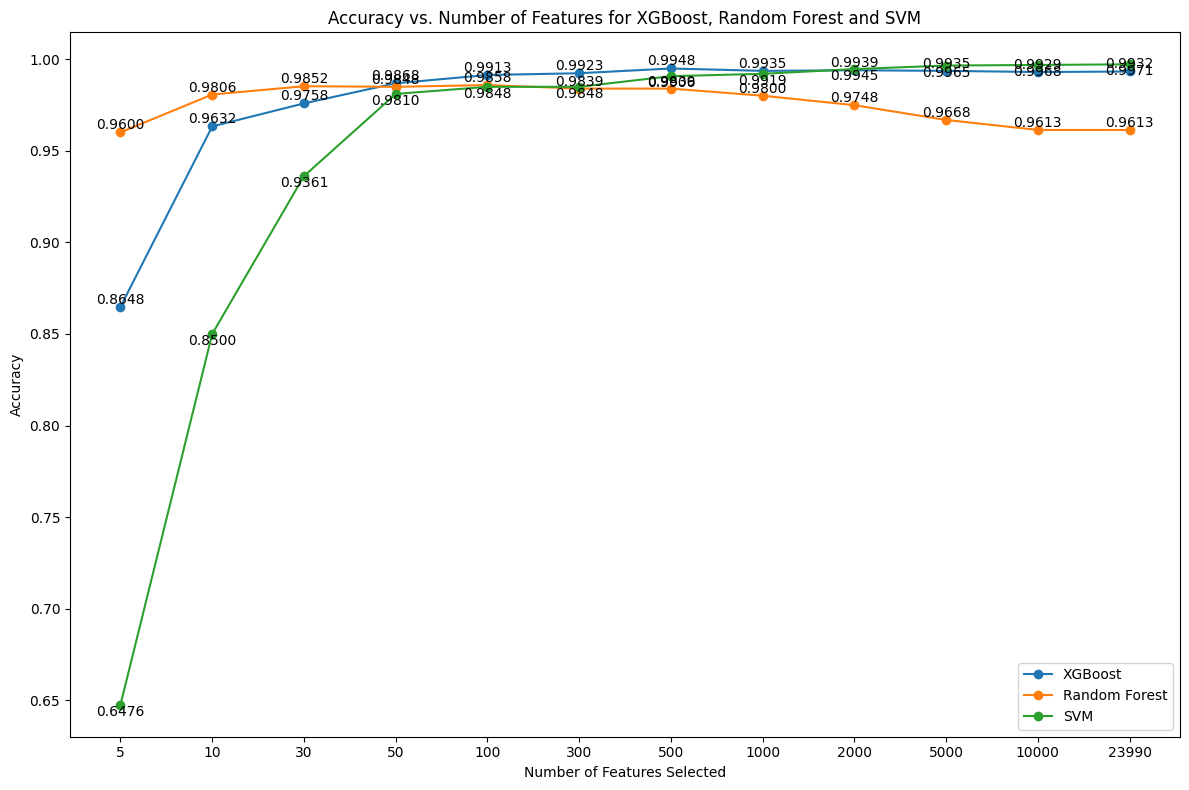

In [6]:

plt.figure(figsize=(12, 8))


plt.plot(str_num_feature_list, xgboost, label='XGBoost', marker='o', linestyle='-')
plt.plot(str_num_feature_list, rf, label='Random Forest', marker='o', linestyle='-')
plt.plot(str_num_feature_list, svm, label='SVM', marker='o', linestyle='-')


for i, txt in enumerate(rf):
    plt.text(str_num_feature_list[i], txt, f"{txt:.4f}", ha='center', va='bottom')  # You can adjust 'ha' and 'va' to position the text appropriately


for i, txt in enumerate(xgboost):
    plt.text(str_num_feature_list[i], txt, f"{txt:.4f}", ha='center', va='bottom')  # You can adjust 'ha' and 'va' to position the text appropriately

for i, txt in enumerate(svm):
    plt.text(str_num_feature_list[i], txt, f"{txt:.4f}", ha='center', va='top')  # You can adjust 'ha' and 'va' to position the text appropriately

plt.xlabel('Number of Features Selected')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Features for XGBoost, Random Forest and SVM')
plt.legend()
plt.tight_layout()
plt.savefig("acc_features_importance.png")
plt.show()

<ipython-input-28-1be39774f6a1>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


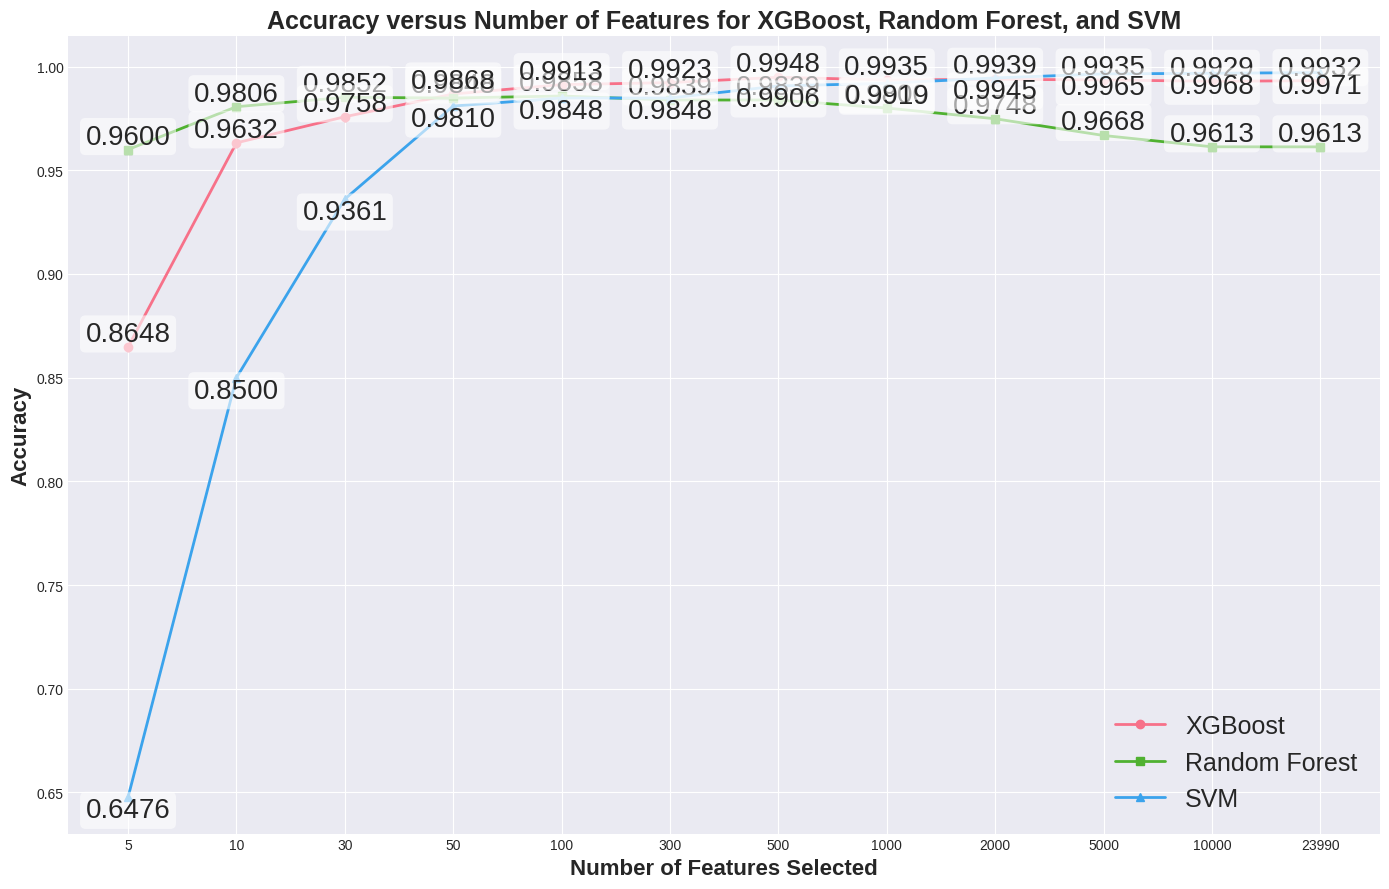

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns  # This library provides a way to beautify plots

# Set the aesthetic style of the plots
plt.style.use('seaborn-darkgrid')

# Set the size of the plot
plt.figure(figsize=(14, 9))

# Color palette
palette = sns.color_palette("husl", 3)  # A pleasing palette with 3 distinct colors

# Plot data
plt.plot(str_num_feature_list, xgboost, label='XGBoost', marker='o', linestyle='-', color=palette[0], linewidth=2)
plt.plot(str_num_feature_list, rf, label='Random Forest', marker='s', linestyle='-', color=palette[1], linewidth=2)
plt.plot(str_num_feature_list, svm, label='SVM', marker='^', linestyle='-', color=palette[2], linewidth=2)

# Add data labels with a background
for i, txt in enumerate(rf):
    plt.text(str_num_feature_list[i], txt, f"{txt:.4f}", ha='center', va='bottom', fontsize=20, bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle="round,pad=0.2"))
for i, txt in enumerate(xgboost):
    plt.text(str_num_feature_list[i], txt, f"{txt:.4f}", ha='center', va='bottom', fontsize=20, bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle="round,pad=0.2"))
for i, txt in enumerate(svm):
    plt.text(str_num_feature_list[i], txt, f"{txt:.4f}", ha='center', va='top', fontsize=20
             , bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle="round,pad=0.2"))

# Set labels, title, and legend
plt.xlabel('Number of Features Selected', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy', fontsize=16, fontweight='bold')
plt.title('Accuracy versus Number of Features for XGBoost, Random Forest, and SVM', fontsize=18, fontweight='bold')
plt.legend(fontsize=18, loc='best')
plt.tight_layout()

# Save and display the plot
plt.savefig("acc_features_importance.png", dpi=300)  # Increase dpi for better resolution
plt.show()

